    Exercise Sheet Week 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-09-25 15:32:16.299704: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Task 1

In [3]:
#define data
X= np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
t=np.array([0.15, -0.16, -0.61, -0.86, -1.02, -0.44, 0.16, 0.05, 0.45, 1.39, 0.86])

In [15]:
sns.set(rc={"figure.figsize":(20, 10)})

## 1.a

1/1 [==============================] - 0s 64ms/step
        loss  epochs
15  0.294046      15
16  0.273666      16
17  0.279572      17
18  0.295562      18
19  0.299850      19
20  0.289270      20
21  0.276633      21


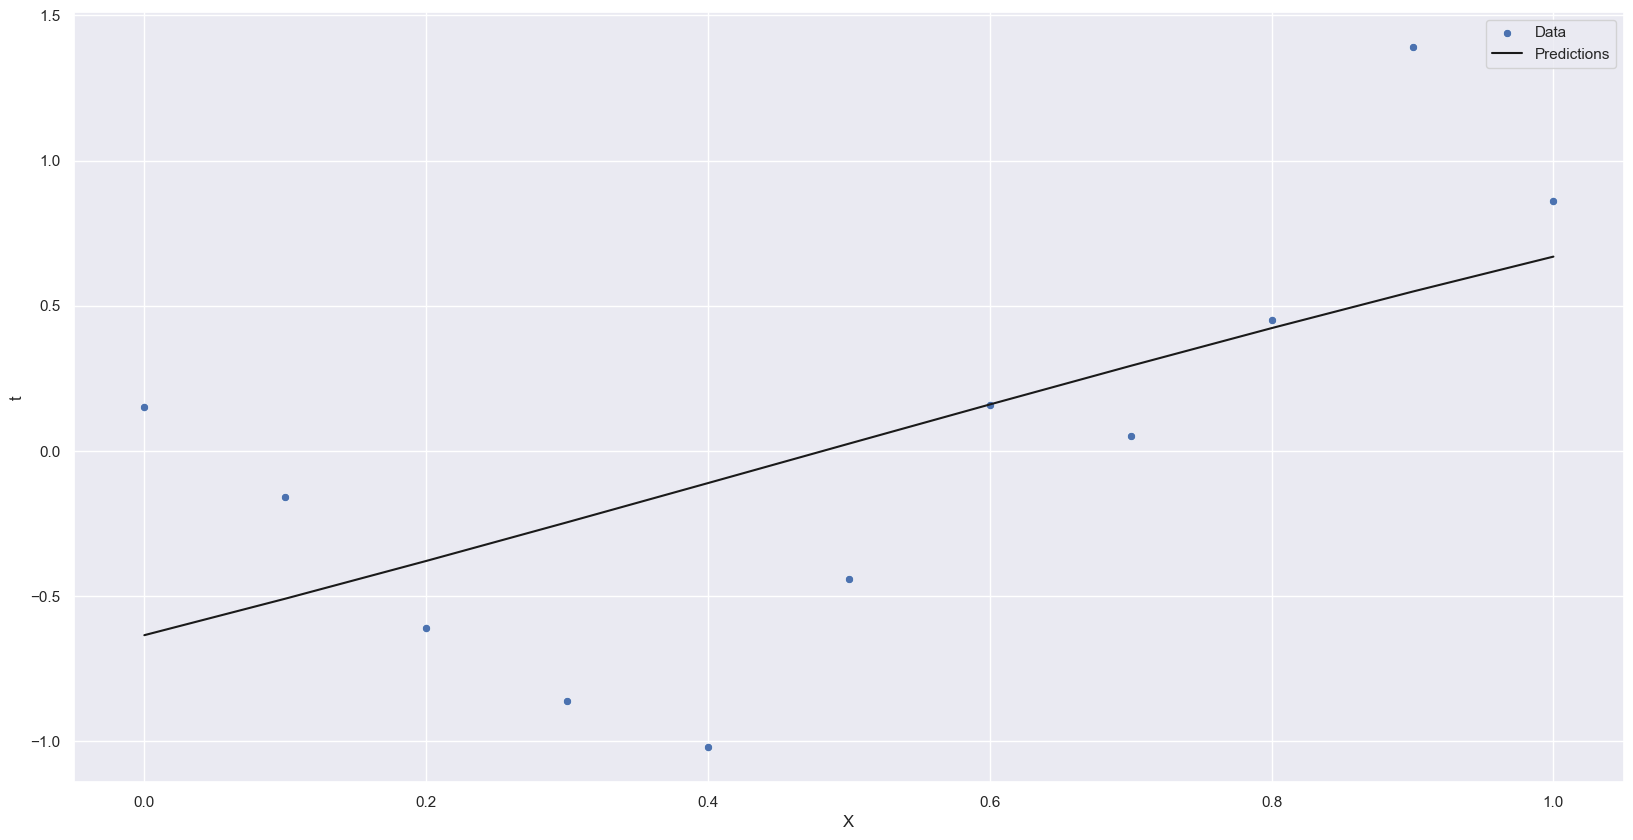

In [22]:
#normalize data
normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
normalizer.adapt(X)

# Create the MLP model
model = keras.Sequential([
    layers.Input(shape=(1,)),   
    # Hidden layer with 10 neurons and tanh activation            
    layers.Dense(10, activation='tanh'),  
    # Output layer with linear activation  
    layers.Dense(1, activation='linear')    
])

#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

# Fit the model and allow to overfit
history = model.fit(
    X, 
    t, 
    epochs=500, 
    verbose=0,
    callbacks =[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])#patience = num of epochs which no improvement after which training stops

#predict target
y = model.predict(X)

#print loss per epoch
df = pd.DataFrame(history.history)
df['epochs'] = history.epoch
print(df.tail(7))

#plotting raw data and estimated model
sns.scatterplot(x = X, y= t, label='Data')
plt.plot(X, y, color='k', label='Predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend();

## 1.b

1/1 [==============================] - 0s 58ms/step


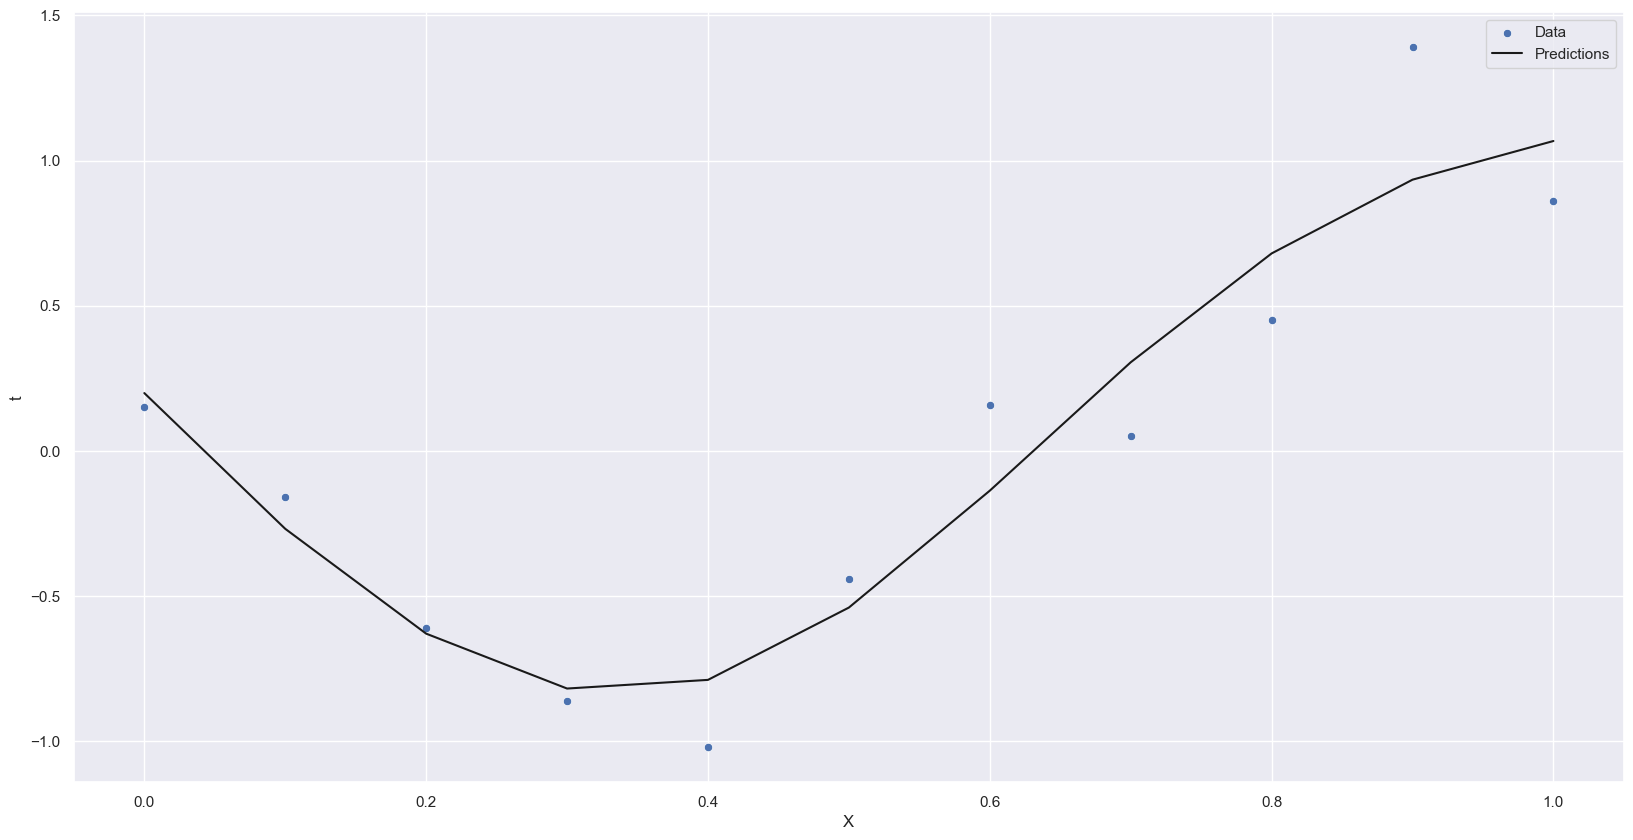

In [26]:
#normalize data
normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
normalizer.adapt(X)

# Create the MLP model
model = keras.Sequential([
    layers.Input(shape=(1,)),   
    # Hidden layer with 10 neurons and tanh activation and l2 regularizer, lamda = 0.001          
    layers.Dense(10, activation='tanh', kernel_regularizer = tf.keras.regularizers.l2(0.001)),  
    # Output layer with linear activation  
    layers.Dense(1, activation='linear')    
])

#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

# Fit the model and allow to overfit
history = model.fit(
    X, 
    t, 
    epochs=500, 
    verbose=0,
    )

#predict target
y = model.predict(X)


#plotting raw data and estimated model
sns.scatterplot(x = X, y= t, label='Data')
plt.plot(X, y, color='k', label='Predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend();

## 1.3

1/1 [==============================] - 0s 63ms/step


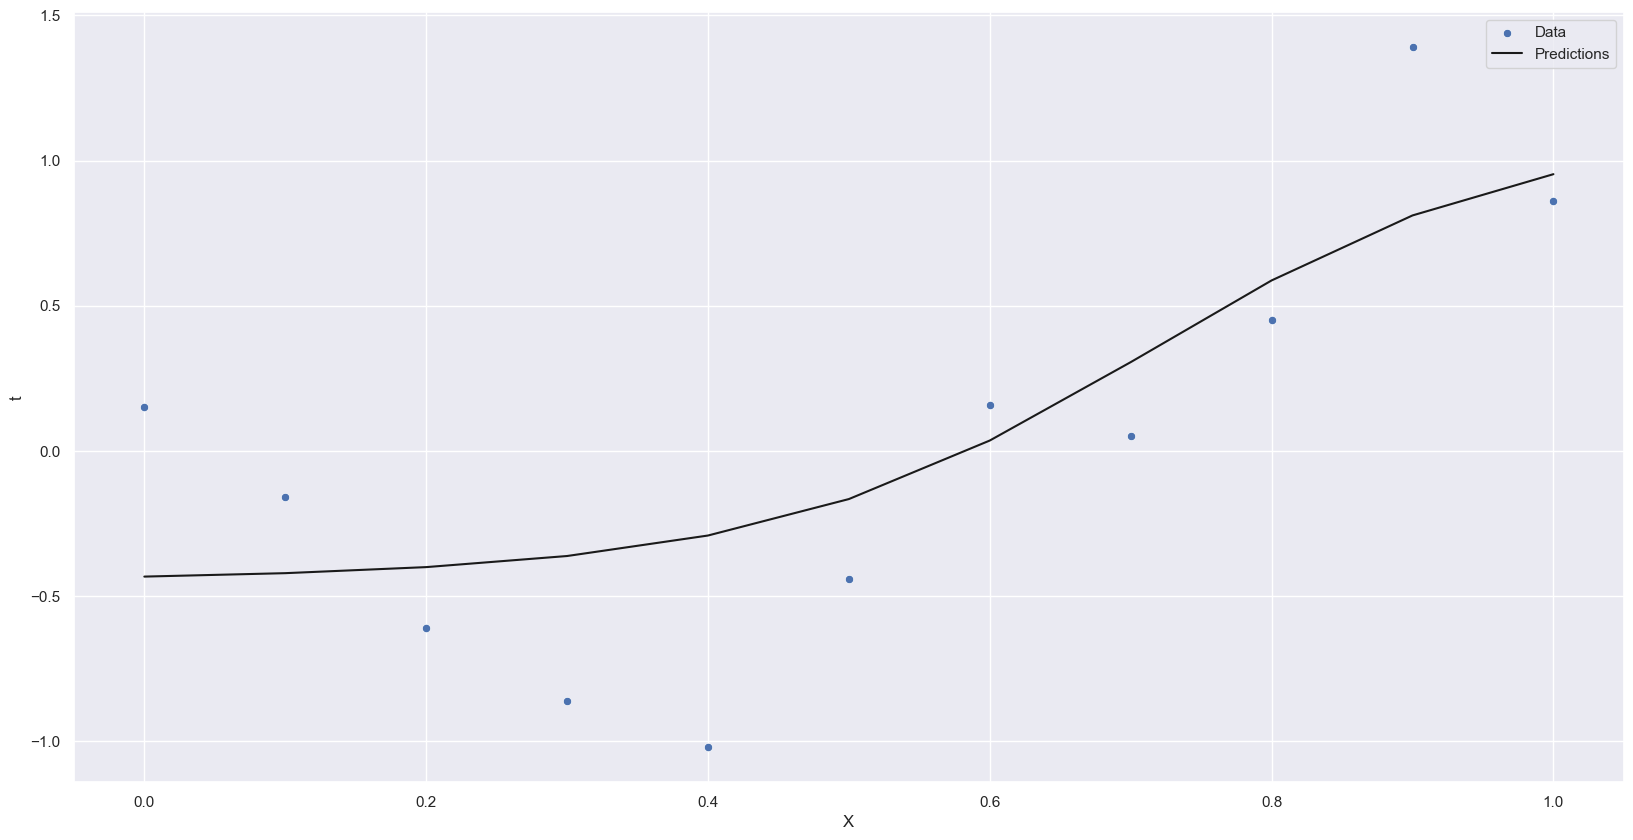

In [27]:
#normalize data
normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
normalizer.adapt(X)

# Create the MLP model
model = keras.Sequential([
    layers.Input(shape=(1,)),   
    # Hidden layer with 10 neurons and tanh activation            
    layers.Dense(10, activation='tanh'), 
    #30% of neurons will be set to 0
    layers.Dropout(0.3),
    # Output layer with linear activation  
    layers.Dense(1, activation='linear')    
])

#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

# Fit the model and allow to overfit
history = model.fit(
    X, 
    t, 
    epochs=500, 
    verbose=0,
    )

#predict target
y = model.predict(X)


#plotting raw data and estimated model
sns.scatterplot(x = X, y= t, label='Data')
plt.plot(X, y, color='k', label='Predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend();

## Task 2

## 2.a

- pretty good accuracy overall (94.75)
- best predictions for 0
- some confusion between 7 and 2 and 5 and 3, but not in both directions

## 2.b

**learning rate:**
- decreasing: longer runtime, much better accuracy right from the first epoch on
- increasing: faster rutime, worse accuracy

**num epochs:**
- increasing: longer runtime and improved accuracy
- decreasing: shorter runtime but worse accuracy

**momentum:**
- increasing: _horrible_ accuracy (when set to 1.5 --> does it have to be between 0 and 1??)
- decreasing: terrible accuracy

## 2.c

- close data points ar emore similar --> tells you which numbers are calssified similarly, which might overlap etc 